In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt # visualization
import pandas as pd
import seaborn as sns # visualization

#Seaborn is a Python data visualization library based on matplotlib. 
#It provides a high-level interface for drawing attractive and informative statistical graphics. 
#https://seaborn.pydata.org/index.html

# bike trip data
#https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset# 



## First Load and explore data

In [2]:
day_df=pd.read_csv('bike_beispiel/day.csv') 
hour_df=pd.read_csv('bike_beispiel/hour.csv') 

In [20]:
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [21]:
# show data in winter
day_df[day_df['season']==4]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
265,2011-09-23,4,0,9,0,5,1,2,0.609167,0.522125,0.972500,0.078367,258,2137,2395
266,2011-09-24,4,0,9,0,6,0,2,0.606667,0.564412,0.862500,0.078383,1776,3647,5423
267,2011-09-25,4,0,9,0,0,0,2,0.634167,0.572637,0.845000,0.050379,1544,3466,5010
268,2011-09-26,4,0,9,0,1,1,2,0.649167,0.589042,0.848333,0.110700,684,3946,4630
269,2011-09-27,4,0,9,0,2,1,2,0.636667,0.574525,0.885417,0.118171,477,3643,4120
270,2011-09-28,4,0,9,0,3,1,2,0.635000,0.575158,0.848750,0.148629,480,3427,3907
271,2011-09-29,4,0,9,0,4,1,1,0.616667,0.574512,0.699167,0.172883,653,4186,4839
272,2011-09-30,4,0,9,0,5,1,1,0.564167,0.544829,0.647500,0.206475,830,4372,5202
273,2011-10-01,4,0,10,0,6,0,2,0.410000,0.412863,0.753750,0.292296,480,1949,2429
274,2011-10-02,4,0,10,0,0,0,2,0.356667,0.345317,0.791667,0.222013,616,2302,2918


In [4]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [22]:
# remove instant column
day_df.drop('instant',axis=1,inplace=True)
hour_df.drop('instant',axis=1,inplace=True)

KeyError: "labels ['instant'] not contained in axis"

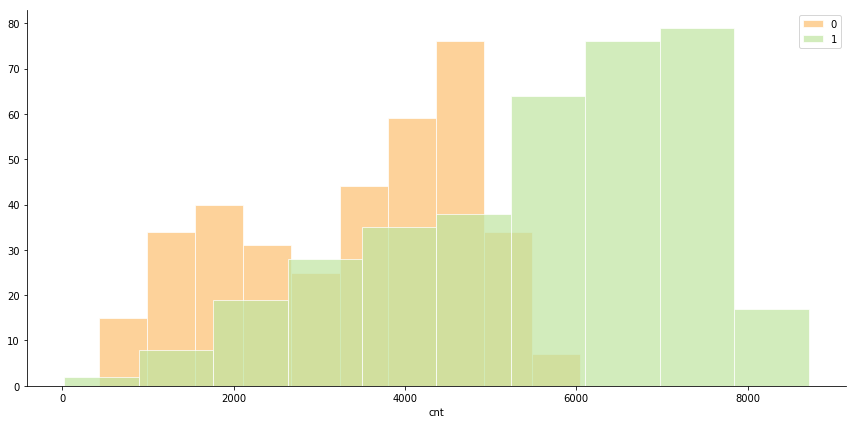

In [45]:
#https://seaborn.pydata.org/tutorial/axis_grids.html#grid-tutorial
g=sns.FacetGrid(day_df, hue='yr', palette='Spectral',size=6,aspect=2)
g=g.map(plt.hist,'cnt',alpha=0.7, edgecolor='w')
plt.legend()

Text(0.5,1,'Number of bikes rented per season')

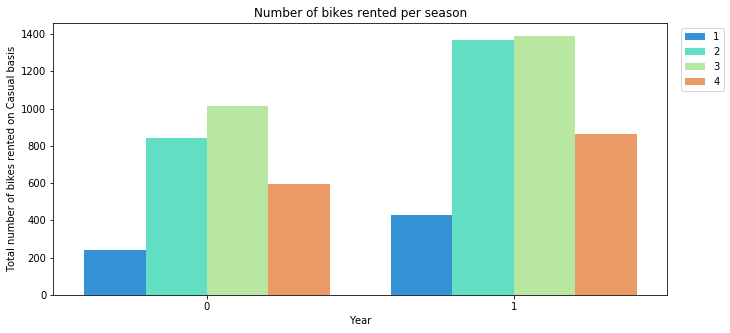

In [62]:
plt.figure(figsize=(11,5))
sns.barplot('yr', 'casual',hue='season', data=day_df,palette='rainbow', ci=None)
plt.legend(bbox_to_anchor=(1.1, 1))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented on Casual basis')
plt.title('Number of bikes rented per season')

Text(0.5,1,'Number of bikes rented per season')

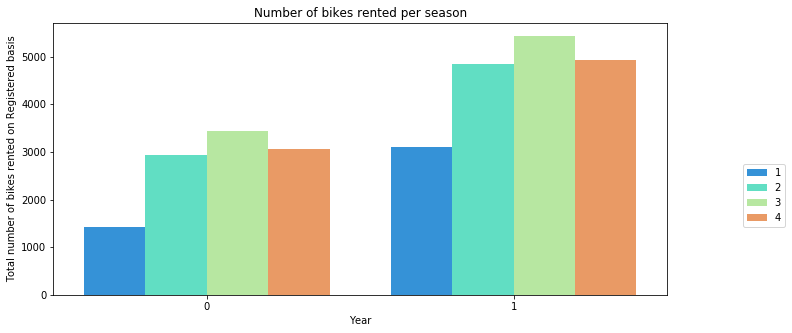

In [8]:
plt.figure(figsize=(11,5))
sns.barplot('yr','registered',hue='season', data=day_df,palette='rainbow', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented on Registered basis')
plt.title('Number of bikes rented per season')

Text(0.5,1,'Number of bikes rented per season')

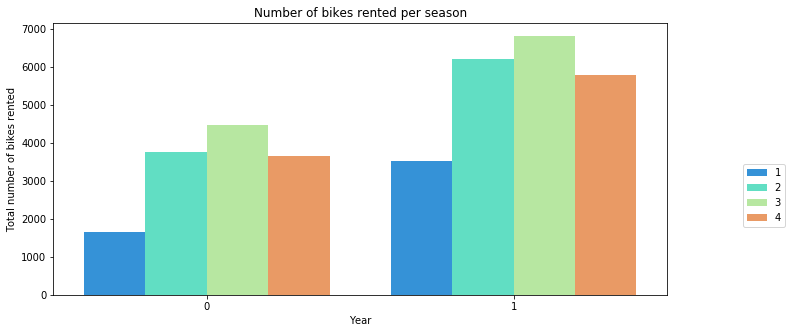

In [9]:
plt.figure(figsize=(11,5))
sns.barplot('yr','cnt',hue='season', data=day_df,palette='rainbow', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented')
plt.title('Number of bikes rented per season')

In [10]:
df_season_fall=day_df[day_df['season']==3]

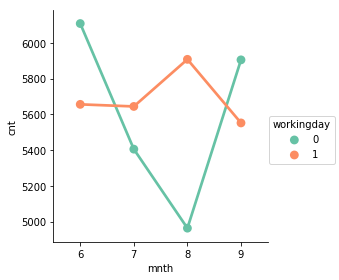

In [66]:
sns.factorplot('mnth','cnt',hue='workingday',data=df_season_fall, ci=None, palette='Set2')

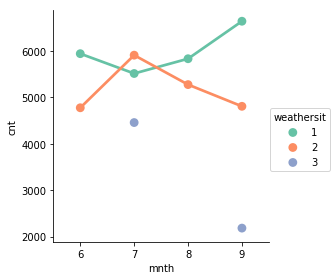

In [12]:
sns.factorplot('mnth','cnt',hue='weathersit',data=df_season_fall, ci=None, palette='Set2')

E:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


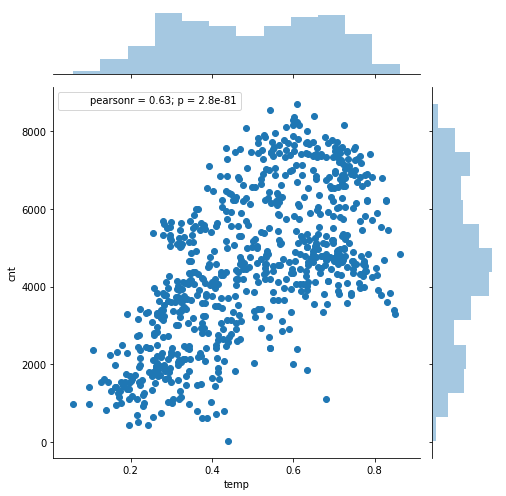

In [68]:
sns.jointplot('temp','cnt', data=day_df,size=7)

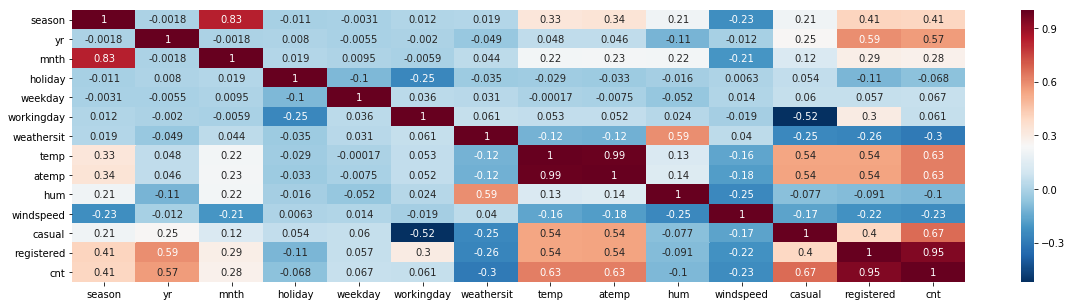

In [70]:
plt.figure(figsize=(20,5))
sns.heatmap(day_df.corr(),cmap='RdBu_r', annot=True)

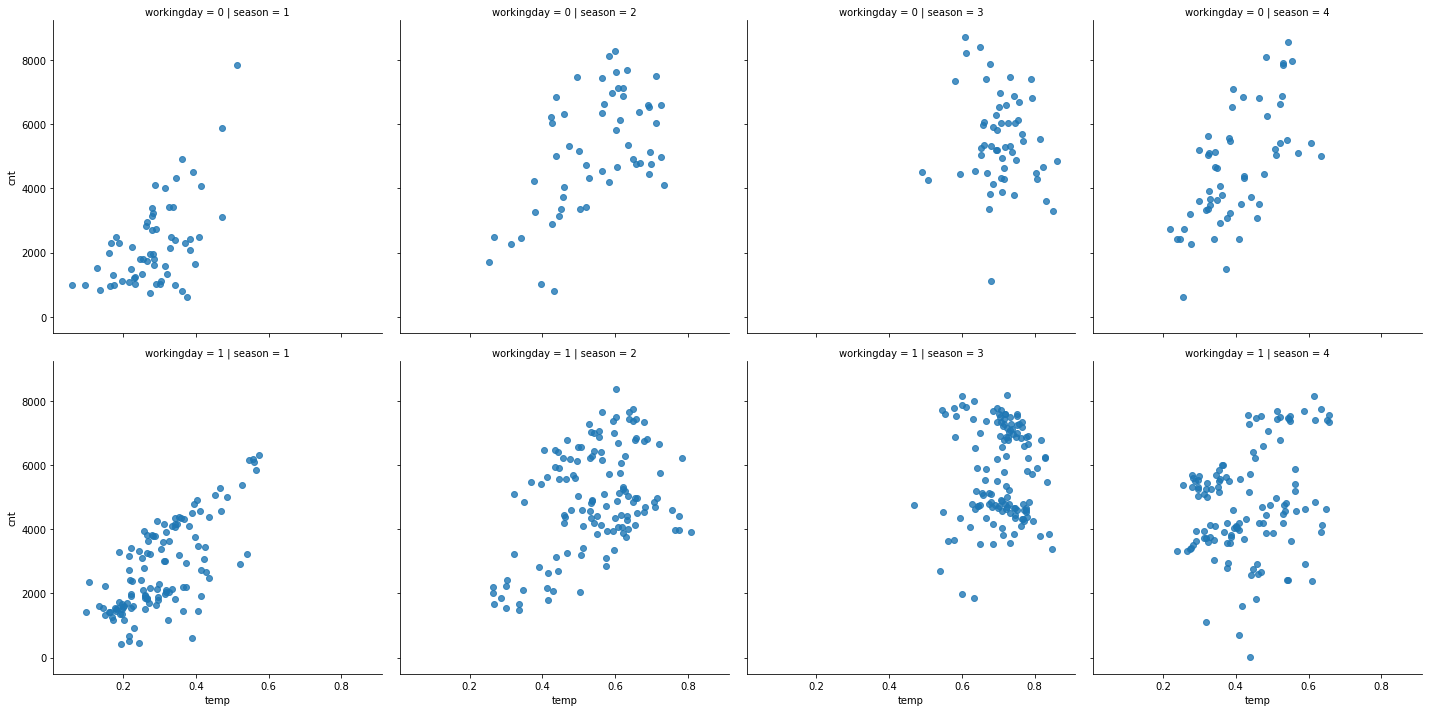

In [15]:
sns.lmplot('temp','cnt',row='workingday',col='season',data=day_df,palette='RdBu_r',fit_reg=False)

## openstreetmap overpass api
http://overpass-turbo.eu/
